## Display Features

In [20]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

from xml.etree.ElementTree import fromstring, ElementTree
import xml.etree.ElementTree as ET

In [21]:
%matplotlib inline
pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Matches

In [22]:
matches = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\DataSets\\matches8.csv",
    index_col=0,
)

In [23]:
matches.head()

,Date,LeagueID,LeagueName,MatchID,HomeTeamID,HomeTeamLongName,HomeTeamShortName,AwayTeamID,AwayTeamLongName,AwayTeamShortName,HomeGoal,AwayGoal,TotalGoals,HomePlayer1,HomePlayer2,HomePlayer3,HomePlayer4,HomePlayer5,HomePlayer6,HomePlayer7,HomePlayer8,HomePlayer9,HomePlayer10,HomePlayer11,AwayPlayer1,AwayPlayer2,AwayPlayer3,AwayPlayer4,AwayPlayer5,AwayPlayer6,AwayPlayer7,AwayPlayer8,AwayPlayer9,AwayPlayer10,AwayPlayer11,HomeShoton,AwayShoton,HomeShotoff,AwayShotoff,HomeFoulCommit,AwayFoulCommit,HomeCard,AwayCard,HomeCross,AwayCross,HomeCorner,AwayCorner,HomeBuildUpPlaySpeed,HomeBuildUpPlayPassing,HomeChanceCreationPassing,HomeChanceCreationCrossing,HomeChanceCreationShooting,HomeDefencePressure,HomeDefenceAggression,HomeDefenceTeamWidth,AwayBuildUpPlaySpeed,AwayBuildUpPlayPassing,AwayChanceCreationPassing,AwayChanceCreationCrossing,AwayChanceCreationShooting,AwayDefencePressure,AwayDefenceAggression,AwayDefenceTeamWidth,Result
0,2010,1,Belgium Jupiler League,665626,8635,RSC Anderlecht,AND,8342,Club Brugge KV,CLB,3,2,5,72.00000,72.00000,72.00000,74.00000,70.00000,71.00000,75.00000,68.00000,72.00000,78.00000,74.00000,72.00000,72.00000,68.00000,72.00000,68.00000,69.00000,70.00000,70.00000,70.00000,72.00000,70.00000,3.00000,3.00000,4.00000,3.00000,7.00000,7.00000,2.00000,2.00000,11.00000,8.00000,3.00000,3.00000,50,35,70,50,60,70,50,70,35,40,45,50,45,60,70,70,1
1,2010,1,Belgium Jupiler League,838635,8635,RSC Anderlecht,AND,8342,Club Brugge KV,CLB,2,2,4,72.00000,74.00000,70.00000,71.00000,60.00000,72.00000,69.00000,68.00000,68.00000,72.00000,74.00000,65.00000,72.00000,68.00000,67.00000,72.00000,68.00000,70.00000,72.00000,72.00000,72.00000,70.00000,3.00000,3.00000,4.00000,3.00000,7.00000,7.00000,2.00000,2.00000,11.00000,8.00000,3.00000,3.00000,50,35,70,50,60,70,50,70,35,40,45,50,45,60,70,70,0
2,2010,1,Belgium Jupiler League,838544,9986,Sporting Charleroi,CHA,8342,Club Brugge KV,CLB,0,5,5,55.00000,63.00000,62.00000,64.00000,64.00000,63.00000,66.00000,62.00000,61.00000,72.00000,63.00000,65.00000,72.00000,68.00000,70.00000,72.00000,72.00000,64.00000,72.00000,72.00000,70.00000,72.00000,3.00000,3.00000,4.00000,3.00000,7.00000,7.00000,2.00000,2.00000,11.00000,8.00000,3.00000,3.00000,40,50,45,43,60,70,70,70,35,40,45,50,45,60,70,70,-1
3,2010,1,Belgium Jupiler League,838714,8203,KV Mechelen,MEC,8342,Club Brugge KV,CLB,0,1,1,70.00000,64.00000,63.00000,66.00000,65.00000,66.00000,65.00000,66.00000,63.00000,66.00000,66.00000,72.00000,72.00000,68.00000,67.00000,70.00000,68.00000,72.00000,70.00000,72.00000,72.00000,69.00000,3.00000,3.00000,4.00000,3.00000,7.00000,7.00000,2.00000,2.00000,11.00000,8.00000,3.00000,3.00000,65,60,50,40,50,60,70,60,35,40,45,50,45,60,70,70,-1
4,2010,1,Belgium Jupiler League,665737,9997,Sint-Truidense VV,STT,8342,Club Brugge KV,CLB,1,1,2,68.00000,70.00000,65.00000,64.00000,65.00000,66.00000,63.00000,67.00000,64.00000,62.00000,73.00000,72.00000,72.00000,68.00000,70.00000,70.00000,68.00000,69.00000,70.00000,72.00000,71.00000,69.00000,3.00000,3.00000,4.00000,3.00000,7.00000,7.00000,2.00000,2.00000,11.00000,8.00000,3.00000,3.00000,50,50,50,50,50,50,50,50,35,40,45,50,45,60,70,70,0


# Logistic Regression

In [24]:
X = matches.drop(
    [
        "Date",
        "LeagueID",
        "LeagueName",
        "MatchID",
        "HomeTeamID",
        "HomeTeamLongName",
        "HomeTeamShortName",
        'AwayTeamID',
        "AwayTeamLongName",
        'AwayTeamShortName',
        'HomeGoal',
        "AwayGoal",
        "TotalGoals"
    ],
    axis=1,
)

In [25]:
X.head()

,HomePlayer1,HomePlayer2,HomePlayer3,HomePlayer4,HomePlayer5,HomePlayer6,HomePlayer7,HomePlayer8,HomePlayer9,HomePlayer10,HomePlayer11,AwayPlayer1,AwayPlayer2,AwayPlayer3,AwayPlayer4,AwayPlayer5,AwayPlayer6,AwayPlayer7,AwayPlayer8,AwayPlayer9,AwayPlayer10,AwayPlayer11,HomeShoton,AwayShoton,HomeShotoff,AwayShotoff,HomeFoulCommit,AwayFoulCommit,HomeCard,AwayCard,HomeCross,AwayCross,HomeCorner,AwayCorner,HomeBuildUpPlaySpeed,HomeBuildUpPlayPassing,HomeChanceCreationPassing,HomeChanceCreationCrossing,HomeChanceCreationShooting,HomeDefencePressure,HomeDefenceAggression,HomeDefenceTeamWidth,AwayBuildUpPlaySpeed,AwayBuildUpPlayPassing,AwayChanceCreationPassing,AwayChanceCreationCrossing,AwayChanceCreationShooting,AwayDefencePressure,AwayDefenceAggression,AwayDefenceTeamWidth,Result
0,72.00000,72.00000,72.00000,74.00000,70.00000,71.00000,75.00000,68.00000,72.00000,78.00000,74.00000,72.00000,72.00000,68.00000,72.00000,68.00000,69.00000,70.00000,70.00000,70.00000,72.00000,70.00000,3.00000,3.00000,4.00000,3.00000,7.00000,7.00000,2.00000,2.00000,11.00000,8.00000,3.00000,3.00000,50,35,70,50,60,70,50,70,35,40,45,50,45,60,70,70,1
1,72.00000,74.00000,70.00000,71.00000,60.00000,72.00000,69.00000,68.00000,68.00000,72.00000,74.00000,65.00000,72.00000,68.00000,67.00000,72.00000,68.00000,70.00000,72.00000,72.00000,72.00000,70.00000,3.00000,3.00000,4.00000,3.00000,7.00000,7.00000,2.00000,2.00000,11.00000,8.00000,3.00000,3.00000,50,35,70,50,60,70,50,70,35,40,45,50,45,60,70,70,0
2,55.00000,63.00000,62.00000,64.00000,64.00000,63.00000,66.00000,62.00000,61.00000,72.00000,63.00000,65.00000,72.00000,68.00000,70.00000,72.00000,72.00000,64.00000,72.00000,72.00000,70.00000,72.00000,3.00000,3.00000,4.00000,3.00000,7.00000,7.00000,2.00000,2.00000,11.00000,8.00000,3.00000,3.00000,40,50,45,43,60,70,70,70,35,40,45,50,45,60,70,70,-1
3,70.00000,64.00000,63.00000,66.00000,65.00000,66.00000,65.00000,66.00000,63.00000,66.00000,66.00000,72.00000,72.00000,68.00000,67.00000,70.00000,68.00000,72.00000,70.00000,72.00000,72.00000,69.00000,3.00000,3.00000,4.00000,3.00000,7.00000,7.00000,2.00000,2.00000,11.00000,8.00000,3.00000,3.00000,65,60,50,40,50,60,70,60,35,40,45,50,45,60,70,70,-1
4,68.00000,70.00000,65.00000,64.00000,65.00000,66.00000,63.00000,67.00000,64.00000,62.00000,73.00000,72.00000,72.00000,68.00000,70.00000,70.00000,68.00000,69.00000,70.00000,72.00000,71.00000,69.00000,3.00000,3.00000,4.00000,3.00000,7.00000,7.00000,2.00000,2.00000,11.00000,8.00000,3.00000,3.00000,50,50,50,50,50,50,50,50,35,40,45,50,45,60,70,70,0


In [26]:
X.shape

(18243, 51)

In [27]:
y = matches['Result']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [30]:
scaler = StandardScaler()

In [31]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

In [34]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', solver='saga')

In [35]:
log_model.coef_

array([[-1.93395958e-02, -4.17516277e-02, -7.28751620e-02,
        -3.56334049e-02, -3.13129394e-02, -2.74030745e-02,
        -5.89746177e-02, -3.97986508e-02, -1.76956882e-02,
        -2.09443674e-02, -5.44320728e-03,  9.84774072e-03,
         1.51306930e-02,  1.49518592e-02,  3.78144240e-02,
         3.52916343e-02,  2.92868499e-02,  4.76361329e-02,
         1.93815363e-02,  4.16395307e-02,  4.15935541e-02,
         5.15060261e-02, -2.19577146e-03,  3.50102501e-02,
         1.93842213e-02,  6.91072738e-03, -3.40855783e-03,
         1.07848229e-03,  5.59069209e-02, -6.29980265e-02,
         1.21195361e-01, -1.68609697e-01, -1.62021439e-02,
         1.83340066e-02, -1.60076768e-02,  9.94936552e-03,
         3.53474356e-03,  1.57966890e-02, -6.94645480e-03,
         1.27307983e-02,  6.13177584e-03, -2.82060850e-02,
         2.31581979e-03, -1.28106081e-02,  1.64846685e-02,
         6.46922783e-04, -5.91472289e-03, -2.01078823e-03,
         1.77175671e-02,  2.12396020e-02, -1.01690336e+0

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [37]:
y_pred = log_model.predict(scaled_X_test)

In [38]:
accuracy_score(y_test,y_pred)

1.0

In [39]:
confusion_matrix(y_test,y_pred)

array([[1289,    0,    0],
       [   0, 1163,    0],
       [   0,    0, 2109]], dtype=int64)

C:\Users\Space\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


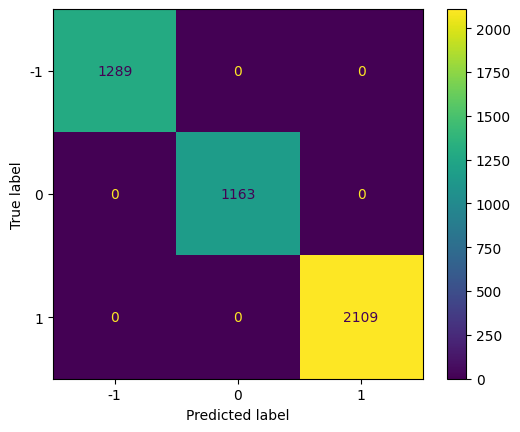

In [40]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1289
           0       1.00      1.00      1.00      1163
           1       1.00      1.00      1.00      2109

    accuracy                           1.00      4561
   macro avg       1.00      1.00      1.00      4561
weighted avg       1.00      1.00      1.00      4561



In [42]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

In [35]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

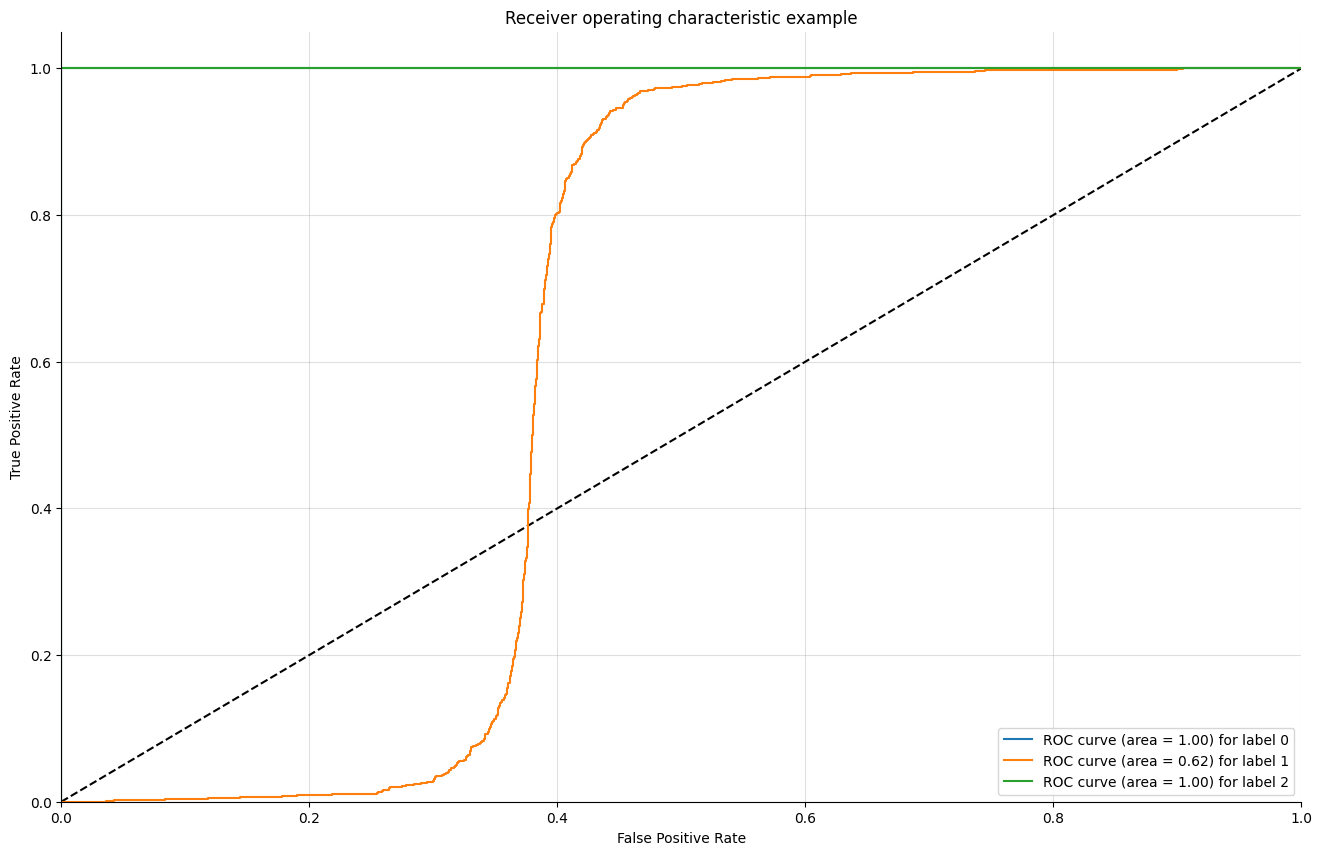

In [36]:
plot_multiclass_roc(log_model, scaled_X_test, y_test, n_classes=3, figsize=(16, 10))